In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../') 

from scipy.sparse import coo_matrix

from dataset import QM9

from torch_geometric.datasets import QM9 as TQM9
from torch_geometric.data import Data



RDKit WARNING: [23:25:29] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
ds_params = {'train_params': {'n': 1000,
                              'features': ['mulliken','coulomb'],
                              'embeds': ['hybrid_types', 'atom_types','atomic_numbers','aromatic'],
                              'targets': ['U0'],
                              'pad': None, 
                              #'filter_on': ('n_atoms','>','18'),
                              'use_pickle': False,
                              'flatten': True,
                              'embed_lookup': {'H': 0, 'C': 1, 'N': 2, 'O': 3, 'F': 4,
                                               'sp': 0, 'sp2': 1, 'sp3':2, 'na': 3,
                                               0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6,
                                               7: 7, 8: 8, 9: 9, 10: 10}}}

qm9 = QM9(**ds_params['train_params'])

creating QM9 dataset...
QM9 molecules scanned:  1
QM9 molecules created:  1
total uncharacterized molecules removed:  25
total QM9 molecules created:  975
CDataset created...


In [3]:
print(qm9.ds_idx[:10])
print(len(qm9.ds_idx))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
975


In [4]:
mol = qm9.ds[11]
print(mol)

dsgdb9nsd_000011


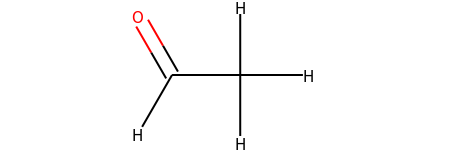

In [5]:
mol.rdmol

In [6]:
print(mol.rdmol.GetNumAtoms())
print(len(mol.atomic_numbers))
print(mol.atomic_numbers)
print(mol.atom_types)

7
7
[6, 6, 8, 1, 1, 1, 1]
['C', 'C', 'O', 'H', 'H', 'H', 'H']


In [7]:
print(mol.mol_block)


     RDKit          2D

  7  6  0  0  0  0  0  0  0  0999 V2000
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2990    0.7500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981    1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.0490   -0.5490    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.5490    2.0490    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  1  4  1  0
  1  5  1  0
  1  6  1  0
  2  7  1  0
M  END



In [8]:
print(mol.properties)

['A', 'B', 'C', 'mu', 'alpha', 'homo', 'lumo', 'gap', 'r2', 'zpve', 'U0', 'U', 'H', 'G', 'Cv', 'smile', 'n_atoms', 'xyz', 'mulliken']


In [9]:
mol.smile

'CC=O\tCC=O\t\n'

In [10]:
mol.qm9_block

['7\n',
 'gdb 11\t57.22434\t10.11122\t9.07368\t2.5682\t25.11\t-0.254\t-0.0198\t0.2342\t166.9728\t0.055355\t-153.787612\t-153.783728\t-153.782784\t-153.812518\t11.219\t\n',
 'C\t-0.0029448212\t 1.5099136648\t 0.0086727849\t-0.450261\n',
 'C\t 0.0260828384\t 0.0032756259\t-0.037459115\t 0.172035\n',
 'O\t 0.9422880119\t-0.6550703513\t-0.4568257611\t-0.225955\n',
 'H\t 0.9227880213\t 1.926342418\t-0.3914655687\t 0.14545\n',
 'H\t-0.8620154031\t 1.878524808\t-0.5647953841\t 0.143233\n',
 'H\t-0.1505063787\t 1.8439338318\t 1.0428910048\t 0.143262\n',
 'H\t-0.8944300885\t-0.4864340773\t 0.3577486492\t 0.072236\n',
 '168.181\t501.1212\t773.3101\t884.1529\t1124.8371\t1138.5323\t1373.2848\t1431.5273\t1459.9055\t1471.282\t1841.2906\t2861.5286\t3029.6122\t3089.0262\t3150.4048\n',
 'CC=O\tCC=O\t\n',
 'InChI=1S/C2H4O/c1-2-3/h2H,1H3\tInChI=1S/C2H4O/c1-2-3/h2H,1H3\n']

In [11]:
print(mol.adjacency.shape)
mol.adjacency

(7, 7)


array([[0, 1, 0, 1, 1, 1, 0],
       [1, 0, 2, 0, 0, 0, 1],
       [0, 2, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [12]:
tqm9 = TQM9(root='./data/qm9')

In [13]:
graph = tqm9[10]

In [14]:
graph

Data(x=[7, 11], edge_index=[2, 12], edge_attr=[12, 4], y=[1, 19], pos=[7, 3], z=[7], name='gdb_11', idx=[1])

In [15]:
graph.idx

tensor([10])

In [16]:
graph.x

tensor([[0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 3.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 8., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [17]:
print(graph.edge_index)

tensor([[0, 0, 0, 0, 1, 1, 1, 2, 3, 4, 5, 6],
        [1, 3, 4, 5, 0, 2, 6, 1, 0, 0, 0, 1]])


In [18]:
graph.edge_attr

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]])

In [19]:
graph.y

tensor([[ 2.5682e+00,  2.5110e+01, -6.9117e+00, -5.3879e-01,  6.3729e+00,
          1.6697e+02,  1.5063e+00, -4.1848e+03, -4.1847e+03, -4.1846e+03,
         -4.1855e+03,  1.1219e+01, -2.7984e+01, -2.8148e+01, -2.8302e+01,
         -2.6304e+01,  5.7224e+01,  1.0111e+01,  9.0737e+00]])

In [20]:
mol.xyz

array([[-0.00294482,  1.5099137 ,  0.00867279],
       [ 0.02608284,  0.00327563, -0.03745912],
       [ 0.94228804, -0.65507036, -0.45682576],
       [ 0.922788  ,  1.9263424 , -0.39146557],
       [-0.8620154 ,  1.8785248 , -0.5647954 ],
       [-0.15050638,  1.8439338 ,  1.042891  ],
       [-0.8944301 , -0.48643407,  0.35774866]], dtype=float32)

In [21]:
graph.pos

tensor([[-0.0029,  1.5099,  0.0087],
        [ 0.0261,  0.0033, -0.0375],
        [ 0.9423, -0.6551, -0.4568],
        [ 0.9228,  1.9263, -0.3915],
        [-0.8620,  1.8785, -0.5648],
        [-0.1505,  1.8439,  1.0429],
        [-0.8944, -0.4864,  0.3577]])

In [22]:
import numpy as np

In [23]:
print(graph.z)
z = [mol.atomic_n[a] for a in mol.atom_types]
z = np.asarray(z, 'int64')
print(z)

tensor([6, 6, 8, 1, 1, 1, 1])
[6 6 8 1 1 1 1]


In [24]:
print(graph.idx)
print(mol)
print(graph.name)

tensor([10])
dsgdb9nsd_000011
gdb_11


In [25]:
print(dir(mol))

['A', 'B', 'C', 'Cv', 'G', 'H', 'U', 'U0', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', 'adjacency', 'alpha', 'aromatic', 'atom_types', 'atomic_n', 'atomic_numbers', 'coulomb', 'create_adjacency', 'create_coulomb', 'create_distance', 'distance', 'gap', 'homo', 'hybrid_types', 'in_file', 'load_data', 'lumo', 'mol_block', 'mu', 'mulliken', 'n_atoms', 'open_file', 'properties', 'qm9_block', 'r2', 'rdmol', 'rdmol_from_smile', 'smile', 'sort_permute', 'xyz', 'zpve']


In [26]:
print(mol.distance.shape)
mol.distance

(7, 7)


array([[0.       , 1.5076237, 2.4077604, 1.0911026, 1.096696 , 1.0967914,
        2.214047 ],
       [1.5076237, 0.       , 1.2036278, 2.1511827, 2.1408787, 2.1415794,
        1.1150556],
       [2.4077604, 1.2036278, 0.       , 2.5823138, 3.1122777, 3.1126149,
        2.0163093],
       [1.0911026, 2.1511827, 2.5823138, 0.       , 1.7938375, 1.7933575,
        3.1120884],
       [1.096696 , 2.1408787, 3.1122777, 1.7938375, 0.       , 1.758436 ,
        2.5387337],
       [1.0967914, 2.1415794, 3.1126149, 1.7933575, 1.758436 , 0.       ,
        2.5403655],
       [2.214047 , 1.1150556, 2.0163093, 3.1120884, 2.5387337, 2.5403655,
        0.       ]], dtype=float32)

In [27]:
print(mol.coulomb.shape)
mol.coulomb

(7, 7)


array([[73.51671  , 13.81891  , 33.18483  , 15.533215 , 23.182642 ,
        15.535144 , 25.643593 ],
       [10.524412 , 36.858112 , 24.888626 , 11.64991  , 17.38698  ,
        11.651357 , 19.232695 ],
       [10.524412 , 10.364182 , 36.858112 , 11.64991  , 17.38698  ,
        11.651357 , 19.232695 ],
       [ 1.7540686,  1.7273637,  4.1481037,  0.5      ,  2.8978302,
         1.941893 ,  3.205449 ],
       [ 1.7540686,  1.7273637,  4.1481037,  1.9416518,  0.5      ,
         1.941893 ,  3.205449 ],
       [ 1.7540686,  1.7273637,  4.1481037,  1.9416518,  2.8978302,
         0.5      ,  3.205449 ],
       [ 1.7540686,  1.7273637,  4.1481037,  1.9416518,  2.8978302,
         1.941893 ,  0.5      ]], dtype=float32)

In [28]:
print(qm9[11][0].shape)
print(qm9[11])

(56,)
(array([-4.5026100e-01,  1.7203499e-01, -2.2595499e-01,  1.4545000e-01,
        1.4323300e-01,  1.4326200e-01,  7.2236001e-02,  7.3516708e+01,
        1.3818910e+01,  3.3184830e+01,  1.5533215e+01,  2.3182642e+01,
        1.5535144e+01,  2.5643593e+01,  1.0524412e+01,  3.6858112e+01,
        2.4888626e+01,  1.1649910e+01,  1.7386980e+01,  1.1651357e+01,
        1.9232695e+01,  1.0524412e+01,  1.0364182e+01,  3.6858112e+01,
        1.1649910e+01,  1.7386980e+01,  1.1651357e+01,  1.9232695e+01,
        1.7540686e+00,  1.7273637e+00,  4.1481037e+00,  5.0000000e-01,
        2.8978302e+00,  1.9418930e+00,  3.2054491e+00,  1.7540686e+00,
        1.7273637e+00,  4.1481037e+00,  1.9416518e+00,  5.0000000e-01,
        1.9418930e+00,  3.2054491e+00,  1.7540686e+00,  1.7273637e+00,
        4.1481037e+00,  1.9416518e+00,  2.8978302e+00,  5.0000000e-01,
        3.2054491e+00,  1.7540686e+00,  1.7273637e+00,  4.1481037e+00,
        1.9416518e+00,  2.8978302e+00,  1.9418930e+00,  5.0000000e-01]

In [29]:
coo = coo_matrix(mol.adjacency)
print(coo)
print(coo.row)
print(coo.col)
print(coo.data)

  (0, 1)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 2)	2
  (1, 6)	1
  (2, 1)	2
  (3, 0)	1
  (4, 0)	1
  (5, 0)	1
  (6, 1)	1
[0 0 0 0 1 1 1 2 3 4 5 6]
[1 3 4 5 0 2 6 1 0 0 0 1]
[1 1 1 1 1 2 1 2 1 1 1 1]


In [30]:
import torch

In [31]:
x = torch.unsqueeze(torch.tensor(qm9[2][0]), 0)
z = torch.tensor(z)
y = torch.tensor(qm9[2][2])
xyz = torch.tensor(mol.xyz)
edge_index = torch.tensor([coo.row, coo.col]).contiguous()

print('x', x)
print(type(x))
print('z', z)
print(z.dtype)
print('y', y)
print('xyz', xyz)
print('edge_index', edge_index)

x tensor([[-0.7071,  0.2357,  0.2357,  0.2357, 53.3587, 18.9409, 18.9400, 18.9400,
          0.9831,  0.5000,  2.7057,  2.7057,  0.9831,  2.7058,  0.5000,  2.7057,
          0.9831,  2.7058,  2.7057,  0.5000]])
<class 'torch.Tensor'>
z tensor([6, 6, 8, 1, 1, 1, 1])
torch.int64
y tensor([-56.5259])
xyz tensor([[-0.0029,  1.5099,  0.0087],
        [ 0.0261,  0.0033, -0.0375],
        [ 0.9423, -0.6551, -0.4568],
        [ 0.9228,  1.9263, -0.3915],
        [-0.8620,  1.8785, -0.5648],
        [-0.1505,  1.8439,  1.0429],
        [-0.8944, -0.4864,  0.3577]])
edge_index tensor([[0, 0, 0, 0, 1, 1, 1, 2, 3, 4, 5, 6],
        [1, 3, 4, 5, 0, 2, 6, 1, 0, 0, 0, 1]], dtype=torch.int32)


In [32]:
data = Data(x=x, z=z, y=y, pos=xyz, edge_index=edge_index)

In [33]:
data.keys

['y', 'x', 'edge_index', 'z', 'pos']

In [34]:
data

Data(x=[1, 20], edge_index=[2, 12], y=[1], pos=[7, 3], z=[7])

In [35]:
data.num_nodes

1

In [36]:
data.num_edges

12

In [37]:
data.num_node_features

20

In [38]:
graph.keys

['y', 'x', 'name', 'edge_index', 'edge_attr', 'z', 'pos', 'idx']

In [39]:
graph

Data(x=[7, 11], edge_index=[2, 12], edge_attr=[12, 4], y=[1, 19], pos=[7, 3], z=[7], name='gdb_11', idx=[1])

In [40]:
graph.num_nodes

7

In [41]:
graph.z

tensor([6, 6, 8, 1, 1, 1, 1])